In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import yaml
import os

In [2]:
# change this directory to the one where the data is stored
data_dir = '/Users/jpga/Documents/reconstruction_scan'
# test file name
test_file_name = 'DYG14_1701987709.h5'

In [3]:
# save yaml file in Python
run_data = yaml.safe_load(open('simple-scan.yml'))

In [4]:
# yaml file is a list of dictionaries
run_data

[{'AWA:Bira3Ctrl:Ch10': -0.5,
  'AWA:Bira4Ctrl:Ch01': 0.0,
  'AWAVXI11ICT:Ch4': [6e-10,
   5e-10,
   5e-10,
   5e-10,
   5e-10,
   6e-10,
   5e-10,
   6e-10,
   5e-10,
   5e-10],
  'pi:QBCR1:Ch7:EnablePulse': 0,
  'save_filename': '/home/awa/awa_data/12-07_6DReconstruction/reconstruction_scan/DYG14_1701987488.h5'},
 {'AWA:Bira3Ctrl:Ch10': -0.45,
  'AWA:Bira4Ctrl:Ch01': 0.0,
  'AWAVXI11ICT:Ch4': [6e-10,
   5e-10,
   5e-10,
   6e-10,
   5e-10,
   5e-10,
   5e-10,
   5e-10,
   6e-10,
   6e-10],
  'pi:QBCR1:Ch7:EnablePulse': 0,
  'save_filename': '/home/awa/awa_data/12-07_6DReconstruction/reconstruction_scan/DYG14_1701987512.h5'},
 {'AWA:Bira3Ctrl:Ch10': -0.4,
  'AWA:Bira4Ctrl:Ch01': 0.0,
  'AWAVXI11ICT:Ch4': [5e-10,
   5e-10,
   6e-10,
   5e-10,
   5e-10,
   5e-10,
   5e-10,
   5e-10,
   6e-10,
   5e-10],
  'pi:QBCR1:Ch7:EnablePulse': 0,
  'save_filename': '/home/awa/awa_data/12-07_6DReconstruction/reconstruction_scan/DYG14_1701987530.h5'},
 {'AWA:Bira3Ctrl:Ch10': -0.35,
  'AWA:Bira4Ctrl:

In [5]:
# first element of yaml file correspond to dictionary for the first quad strength
run_data[0]

{'AWA:Bira3Ctrl:Ch10': -0.5,
 'AWA:Bira4Ctrl:Ch01': 0.0,
 'AWAVXI11ICT:Ch4': [6e-10,
  5e-10,
  5e-10,
  5e-10,
  5e-10,
  6e-10,
  5e-10,
  6e-10,
  5e-10,
  5e-10],
 'pi:QBCR1:Ch7:EnablePulse': 0,
 'save_filename': '/home/awa/awa_data/12-07_6DReconstruction/reconstruction_scan/DYG14_1701987488.h5'}

In [6]:
quad_pv_name = 'AWA:Bira3Ctrl:Ch10' # key for the quad strengths
run_data[0][quad_pv_name] # first quad strength

-0.5

In [7]:
test_file_name = run_data[0]['save_filename'][-19:] # h5 filename for the 1st quad strength
print(test_file_name)
# load the h5 file into Python:
test_file = h5py.File(os.path.join(data_dir, test_file_name), 'r')

DYG14_1701987488.h5


In [8]:
# shape of images array (n_imgs x pixels x pixels)
dim_imgs = test_file['images'].shape
print(dim_imgs)

(10, 700, 700)


In [9]:
# Initialize array to save organized data:

# array with the quad strengths
ks = np.zeros_like(run_data)
print(ks.shape)
# array with the images
imgs = np.zeros((len(run_data), *dim_imgs)) #np.zeros((21,10,700,700))
print(imgs.shape)

(21,)
(21, 10, 700, 700)


In [10]:
# iterate over quad strengths:
for i in range(len(run_data)):
    # save quad strength
    ks[i] = run_data[i][quad_pv_name]
    # load images
    file_name = run_data[i]['save_filename'][-19:]
    file = h5py.File(os.path.join(data_dir, file_name), 'r')
    # save image data into array:
    imgs[i] = test_file['images'][:]

In [11]:
# show ks
ks

array([-0.5, -0.45, -0.4, -0.35, -0.3, -0.25, -0.2, -0.15, -0.1, -0.05,
       0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5],
      dtype=object)

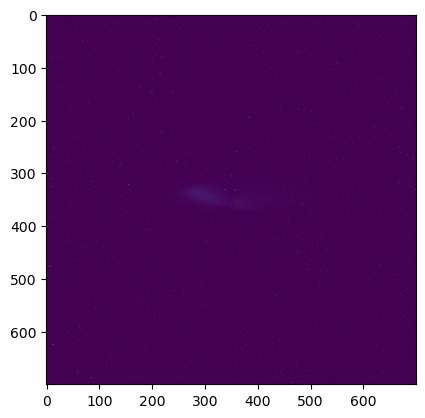

In [12]:
# plot first image of the first quad strength
plt.imshow(imgs[0][0])

# Homework:

1. Create a transform function that receives the control system quad strengths values array and returns an array with physical units. The physical values of the quad strengths is given by:

    $ k = \frac{B_0}{a} \frac{1}{B\rho} $, 

    where $B_0/a$ is the magnetic field gradient in the quadrupole magnet, and $B\rho$ is the _beam rigidity_. The gradient is directly proportional to the control values of the quad strength: 
    
    `gradient = quad_control_system_value*100*1.32e-2/1.29*1.04`

    The beam rigidity quantifies how difficult it is to bend a charged particle beam in an accelerator. It is given by the charged particle beam reference momentum in electron-volts (eV) divided by the speed of light in m/s:

    $B\rho = \frac{P_0\mathrm{\ [eV]}}{c\mathrm{\ [m/s]}} = \frac{43.3 \times 10^6\mathrm{\ eV}}{299 792 458 \mathrm{\ m/s}}$

2. use this function to get `ks_physical_units`

3. Make a plot with 21x10 subplots showing every image in the dataset. Think of a good way to indicate for which k value each plot corresponds. Try to make it _publication quality_, a.k.a _neat_ and easliy readable.